In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import mcbe

from PIL import Image
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from random import randint
import random
import tensorflow as tf


In [2]:
alphas_normal = np.load("alphas_normal_bigger.npy")
alphas_sphere = np.load("alphas_sphere_bigger.npy")

In [3]:
#load tensor data
alphas_normal = tf.saved_model.load("alphas_normal")
alphas_sphere = tf.saved_model.load("alphas_sphere")

In [4]:
alphas_normal = np.array(alphas_normal)
alphas_sphere = np.array(alphas_sphere)

In [5]:
m_max = alphas_normal.shape[0]
n_max = alphas_normal.shape[1]

In [6]:
b0_normal = np.zeros((m_max, n_max))
bconstant_normal = np.zeros((m_max, n_max))
bfixednormal_normal = np.zeros((m_max, n_max))
bnormal_normal = np.zeros((m_max, n_max))
b0_sphere = np.zeros((m_max, n_max))
bconstant_sphere = np.zeros((m_max, n_max))
bfixednormal_sphere = np.zeros((m_max, n_max))
bnormal_sphere = np.zeros((m_max, n_max))
bnormal_normal_std1 = np.zeros((m_max, n_max))

In [7]:

fixednormalbias = np.random.normal(loc=0, scale=0.1, size=m_max)
covering_radius = 0.002*(500000/np.log(500000))**(np.arange(2,n_max+2,dtype=float)**(-1))*np.arange(2,n_max+2,dtype=float)

In [8]:
covering_radius

array([0.78079849, 0.20190042, 0.11177109, 0.08245018, 0.06961042,
       0.06317578, 0.05980531, 0.05811227, 0.05742828, 0.05739491,
       0.05780398, 0.05852679, 0.05947977, 0.06060639, 0.06186711,
       0.06323347, 0.06468449, 0.06620437, 0.06778099, 0.0694049 ,
       0.07106865, 0.07276624, 0.07449283, 0.07624447, 0.07801786,
       0.07981029, 0.08161945, 0.08344341, 0.08528052, 0.08712936])

In [8]:
for m in range(2,m_max):
    for n in range(n_max):

        alphas_normal[m, n, :] = alphas_normal[m, n, :] - covering_radius[n]
        alphas_sphere[m, n, :] = alphas_sphere[m, n, :] - covering_radius[n]

        #b0_normal
        b0_normal[m, n] = np.mean(alphas_normal[m, n, :][:m] >= 0)
        if m < 2*n:
            b0_normal[m, n] = 0

        #bconstant_normal
        bconstant_normal[m, n] = np.mean(alphas_normal[m, n, :][:m] >= 0.1)

        #bfixednormal_normal
        bfixednormal_normal[m, n] = np.mean(alphas_normal[m, n, :][:m] >= fixednormalbias[:m])
        if np.all(alphas_normal[m, n, :] == - covering_radius[n]):
            bfixednormal_normal[m, n] = 0

        #bnormal_normal
        normalbias = np.random.normal(loc=0, scale=0.1, size=m)
        bnormal_normal[m, n] = np.mean(alphas_normal[m, n, :][:m] >= normalbias)
        if np.all(alphas_normal[m, n, :] == - covering_radius[n]):
            bnormal_normal[m, n] = 0

        #bnormal_normal_std1
        normalbias = np.random.normal(loc=0, scale=1, size=m)
        bnormal_normal_std1[m, n] = np.mean(alphas_normal[m, n, :][:m] >= normalbias)
        if np.all(alphas_normal[m, n, :] == - covering_radius[n]):
            bnormal_normal_std1[m, n] = 0

        #b0_sphere
        b0_sphere[m, n] = np.mean(alphas_sphere[m, n, :][:m] >= 0)
        if m < 2*n:
            b0_sphere[m, n] = 0

        #bconstant_sphere
        bconstant_sphere[m, n] = np.mean(alphas_sphere[m, n, :][:m] >= 0.1)

        #bfixednormal_sphere
        bfixednormal_sphere[m, n] = np.mean(alphas_sphere[m, n, :][:m] >= fixednormalbias[:m])
        if np.all(alphas_sphere[m, n, :] == - covering_radius[n]):
            bfixednormal_sphere[m, n] = 0

        #bnormal_sphere
        normalbias = np.random.normal(loc=0, scale=0.1, size=m)
        bnormal_sphere[m, n] = np.mean(alphas_sphere[m, n, :][:m] >= normalbias)
        if np.all(alphas_sphere[m, n, :] == - covering_radius[n]):
            bnormal_sphere[m, n] = 0

        
        

In [52]:
plt.rcParams.update({'font.family':'Times New Roman', 'font.size': 28})

Text(0.5, 1.0, 'b=random normal bias with std=0.1 X=S')

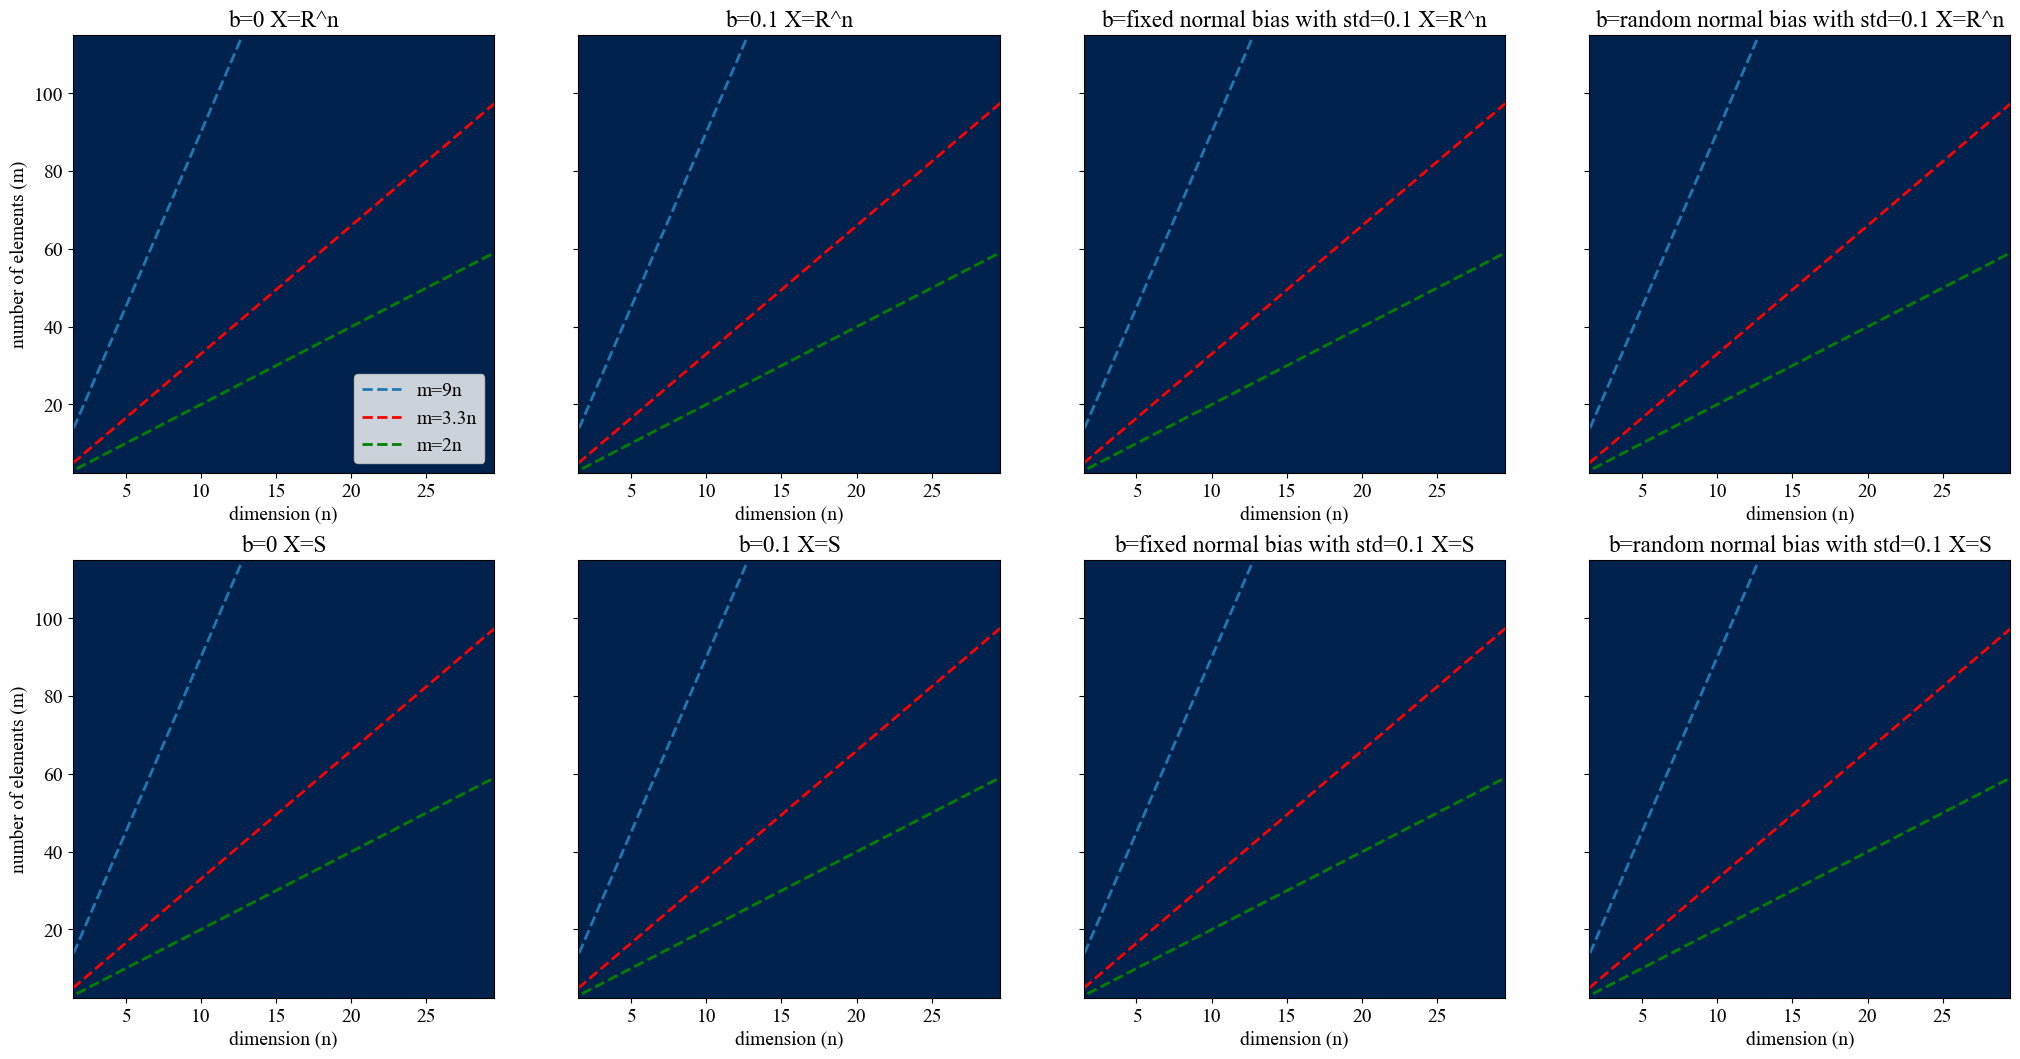

In [9]:
#three plots on same figure
fig, axs = plt.subplots(2, 4, figsize=(25,12.5), sharey=True)
#make fontsoze bigger

axs[0,0].imshow(b0_normal,cmap="cividis")
axs[0,0].set_xlabel("dimension (n)")
axs[0,0].set_ylim((2.5,115))
axs[0,0].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[0,0].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[0,0].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[0,0].set_xlim((1.5,n_max-0.5))
axs[0,0].set_aspect('auto')
axs[0,0].set_ylabel("number of elements (m)")
axs[0,0].legend(["m=9n","m=3.3n","m=2n","m=n"])
axs[0,0].set_title("b=0 X=R^n")

axs[0,1].imshow(bconstant_normal,cmap="cividis")
axs[0,1].set_xlabel("dimension (n)")
axs[0,1].set_ylim((2.5,115))
axs[0,1].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[0,1].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[0,1].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[0,1].set_xlim((1.5,n_max-0.5))
axs[0,1].set_aspect('auto')
axs[0,1].set_title("b=0.1 X=R^n")

axs[0,2].imshow(bfixednormal_normal,cmap="cividis")
axs[0,2].set_xlabel("dimension (n)")
axs[0,2].set_ylim((2.5,115))
axs[0,2].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[0,2].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[0,2].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[0,2].set_xlim((1.5,n_max-0.5))
axs[0,2].set_aspect('auto')
axs[0,2].set_title("b=fixed normal bias with std=0.1 X=R^n")

axs[0,3].imshow(bnormal_normal,cmap="cividis")
axs[0,3].set_xlabel("dimension (n)")
axs[0,3].set_ylim((2.5,115))
axs[0,3].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[0,3].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[0,3].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[0,3].set_xlim((1.5,n_max-0.5))
axs[0,3].set_aspect('auto')
axs[0,3].set_title("b=random normal bias with std=0.1 X=R^n")

axs[1,0].imshow(b0_sphere,cmap="cividis")
axs[1,0].set_xlabel("dimension (n)")
axs[1,0].set_ylim((2.5,115))
axs[1,0].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[1,0].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[1,0].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[1,0].set_xlim((1.5,n_max-0.5))
axs[1,0].set_aspect('auto')
axs[1,0].set_ylabel("number of elements (m)")
axs[1,0].set_title("b=0 X=S")

axs[1,1].imshow(bconstant_sphere,cmap="cividis")
axs[1,1].set_xlabel("dimension (n)")
axs[1,1].set_ylim((2.5,115))
axs[1,1].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[1,1].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[1,1].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[1,1].set_xlim((1.5,n_max-0.5))
axs[1,1].set_aspect('auto')
axs[1,1].set_title("b=0.1 X=S")

axs[1,2].imshow(bfixednormal_sphere,cmap="cividis")
axs[1,2].set_xlabel("dimension (n)")
axs[1,2].set_ylim((2.5,115))
axs[1,2].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[1,2].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[1,2].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[1,2].set_xlim((1.5,n_max-0.5))
axs[1,2].set_aspect('auto')
axs[1,2].set_title("b=fixed normal bias with std=0.1 X=S")

axs[1,3].imshow(bnormal_sphere,cmap="cividis")
axs[1,3].set_xlabel("dimension (n)")
axs[1,3].set_ylim((2.5,115))
axs[1,3].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=2,linestyle="--")
axs[1,3].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=2,linestyle="--",color="red")
axs[1,3].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=2,linestyle="--",color="green")
axs[1,3].set_xlim((1.5,n_max-0.5))
axs[1,3].set_aspect('auto')
axs[1,3].set_title("b=random normal bias with std=0.1 X=S")



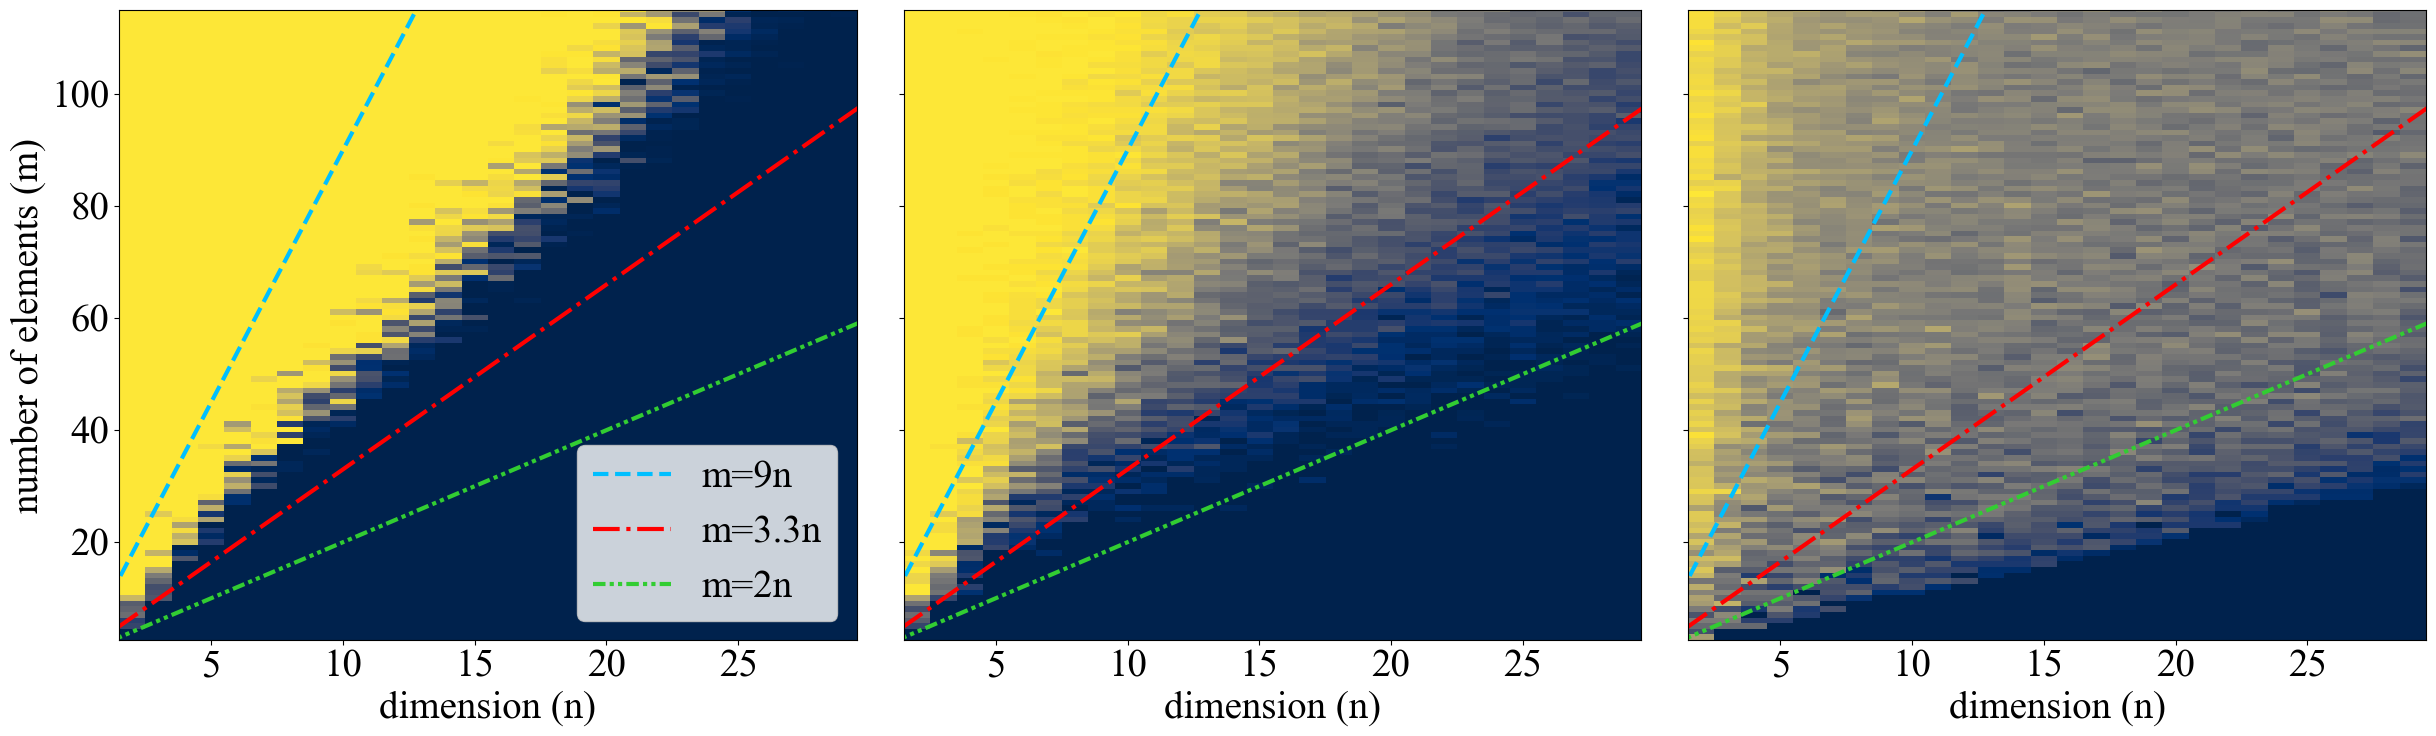

In [54]:
#three plots on same figure
fig, axs = plt.subplots(1, 3, figsize=(25,8), sharey=True)
#make fontsoze bigger

axs[0].imshow(b0_normal,cmap="cividis")
axs[0].set_xlabel("dimension (n)")
axs[0].set_ylim((2.5,115))
axs[0].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=3,linestyle="--",color = "deepskyblue")
axs[0].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=3,linestyle="-.",color="red")
axs[0].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=3,linestyle=(0, (3, 1, 1, 1, 1, 1)),color="limegreen")
axs[0].set_xlim((1.5,n_max-0.5))
axs[0].set_aspect('auto')
axs[0].set_ylabel("number of elements (m)")
axs[0].legend(["m=9n","m=3.3n","m=2n","m=n"],loc="lower right")

axs[1].imshow(bnormal_normal,cmap="cividis")
axs[1].set_xlabel("dimension (n)")
axs[1].set_ylim((2.5,115))
axs[1].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=3,linestyle="--",color = "deepskyblue")
axs[1].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=3,linestyle="-.",color="red")
axs[1].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=3,linestyle=(0, (3, 1, 1, 1, 1, 1)),color="limegreen")
axs[1].set_xlim((1.5,n_max-0.5))
axs[1].set_aspect('auto')

axs[2].imshow(bnormal_normal_std1,cmap="cividis")
axs[2].set_xlabel("dimension (n)")
axs[2].set_ylim((2.5,115))
axs[2].plot(range(m_max),[x*9 for x in range(int(m_max))],linewidth=3,color = "deepskyblue",linestyle="--")
axs[2].plot(range(m_max),[x*3.3 for x in range(int(m_max))],linewidth=3,color="red",linestyle="-.")
axs[2].plot(range(m_max),[x*2 for x in range(int(m_max))],linewidth=3,color="limegreen",linestyle=(0, (3, 1, 1, 1, 1, 1)))
axs[2].set_xlim((1.5,n_max-0.5))
axs[2].set_aspect('auto')

plt.tight_layout()
plt.savefig("big_plots_dani.pdf")
plt.show()